# `20180403b` - processing side  - version p

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

p_D_25V_200us_gain500_-200us-16-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


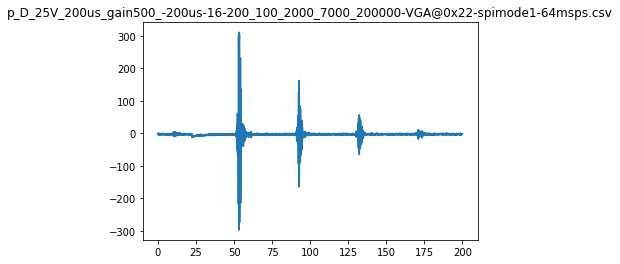

p_D_25V_200us_gain1000_-200us-15-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


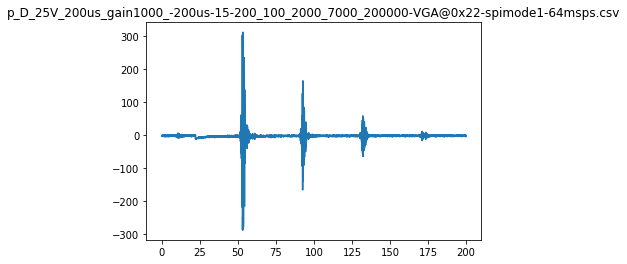

p_D_25V_200us_-200us-10-80_10_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


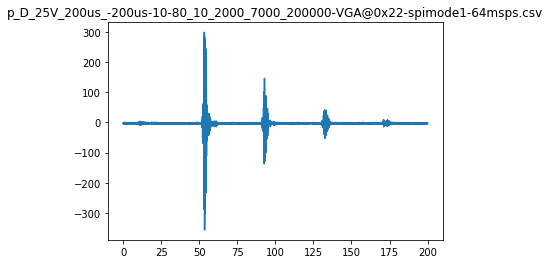

p_D_25V_200us_gain100_-200us-13-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


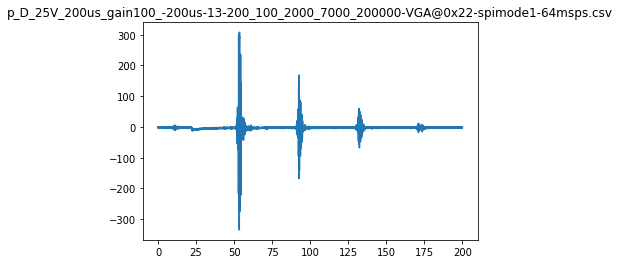

p_A-130us-0-VGA@0x22-spimode1-64msps.csv
first


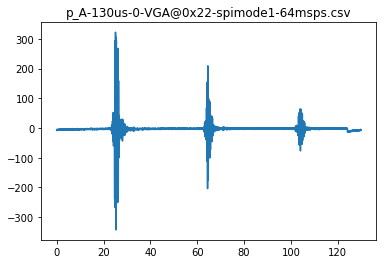

p_D_25V_200us_gainbasique_-200us-5-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


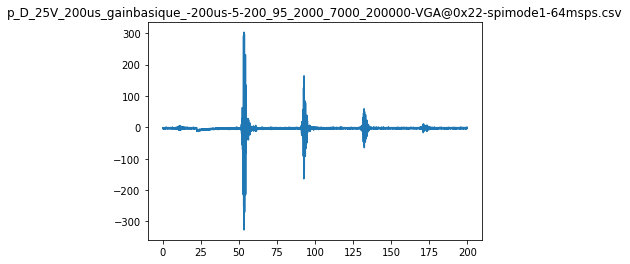

p_D_25V_200us_gain0to1000lineaire_-200us-7-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


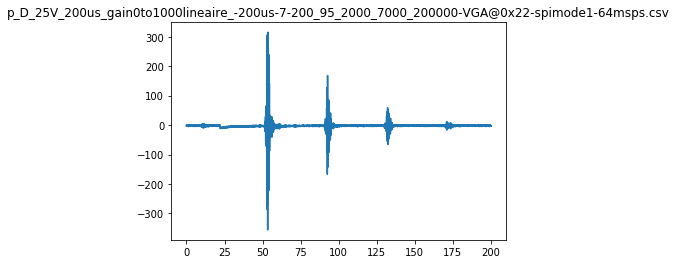

p_D_25V_-130us-2-200_95_2000_7000_130000-VGA@0x22-spimode1-64msps.csv
first


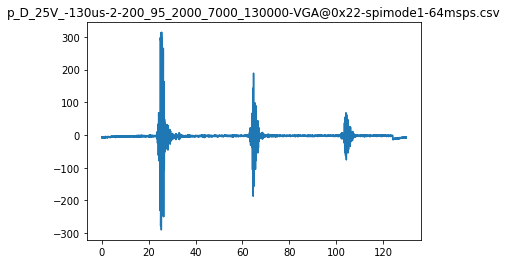

p_D_25V_200us_gain800_-200us-12-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


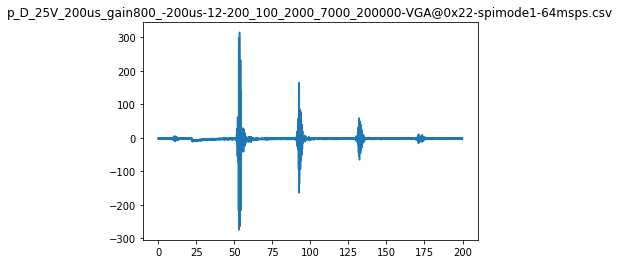

p_D_25V_200us_-200us-9-100_10_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


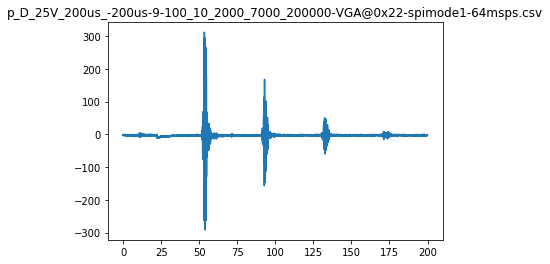

p_D_25V_200us_-200us-8-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


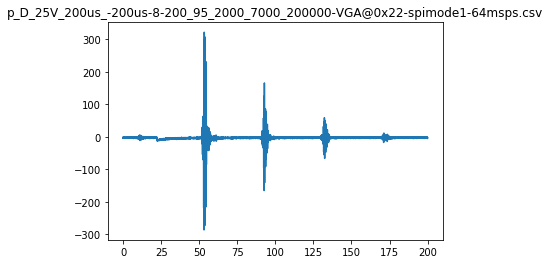

p_D_75V_-130us-4-200_95_2000_7000_130000-VGA@0x22-spimode1-64msps.csv
first


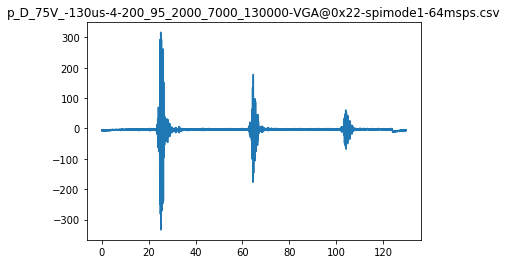

p_D_25V_200us_gain0to1000expo_-200us-6-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


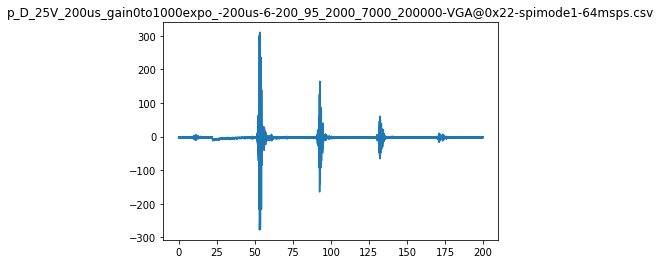

p_A-130us-1-VGA@0x22-spimode1-64msps.csv
first


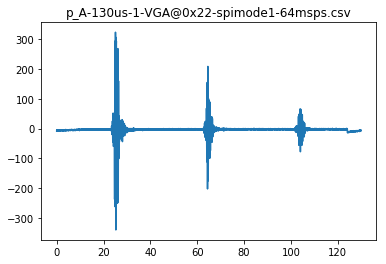

p_D_50V_-130us-3-200_95_2000_7000_130000-VGA@0x22-spimode1-64msps.csv
first


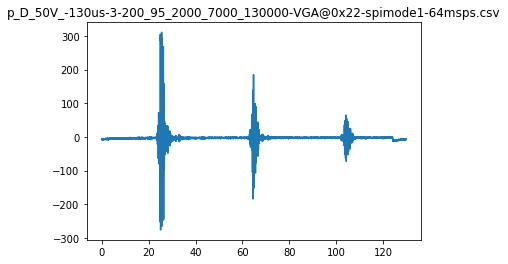

p_D_25V_200us_gain400_-200us-14-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
first


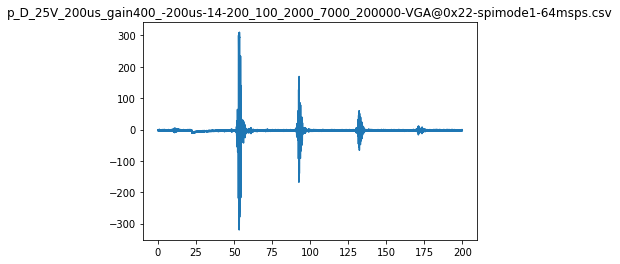

In [2]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("*.csv"):
    print CSVFile
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[4]) > 0b111:
        print "first"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+0]&0b111) + A[2*i+1] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
            tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16)
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    #t = t*1.0/f
    t = [ 1.0*x/f for x in range(len(tmp))]
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig(CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()
    
    AA.append(tmp)
    




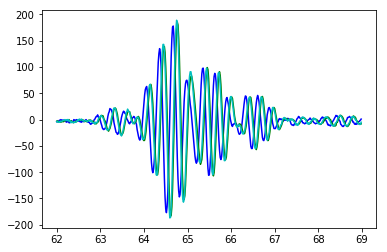

In [12]:
stt = 62*64
stp = 69 * 64

plt.plot(t[stt:stp],AA[11][stt:stp],"b")
plt.plot(t[stt:stp],AA[14][stt:stp],"g")
plt.plot(t[stt:stp],AA[7][stt:stp],"c")
plt.show()

In [5]:
len(AA)

16

In [8]:
i=0
for k in glob.glob("*.csv"):
    print i,k
    i = i+1

0 p_D_25V_200us_gain500_-200us-16-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
1 p_D_25V_200us_gain1000_-200us-15-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
2 p_D_25V_200us_-200us-10-80_10_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
3 p_D_25V_200us_gain100_-200us-13-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
4 p_A-130us-0-VGA@0x22-spimode1-64msps.csv
5 p_D_25V_200us_gainbasique_-200us-5-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
6 p_D_25V_200us_gain0to1000lineaire_-200us-7-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
7 p_D_25V_-130us-2-200_95_2000_7000_130000-VGA@0x22-spimode1-64msps.csv
8 p_D_25V_200us_gain800_-200us-12-200_100_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
9 p_D_25V_200us_-200us-9-100_10_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
10 p_D_25V_200us_-200us-8-200_95_2000_7000_200000-VGA@0x22-spimode1-64msps.csv
11 p_D_75V_-130us-4-200_95_2000_7000_130000-VGA@0x22-spimode1-64msps.csv
12 p_D_25V_200us_gain0to1000expo_-20

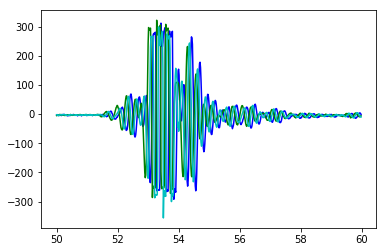

In [15]:
stt = 50*64
stp = 60 * 64

plt.plot(t[stt:stp],AA[9][stt:stp],"b")
plt.plot(t[stt:stp],AA[10][stt:stp],"g")
plt.plot(t[stt:stp],AA[2][stt:stp],"c")
plt.show()